In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import numpy as np
import sklearn, sklearn.model_selection
import matplotlib.pyplot as plt
import collections
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
BATCH_SIZE = 64

In [4]:
mytransform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(100),
    torchvision.transforms.ToTensor()])

#data = torchvision.datasets.ImageFolder("/data/lisa/data/cure-cancer-in-images/transformed-images/brats2013_train/", transform=mytransform)

In [4]:
plt.imshow(data[100][0][0].numpy());
plt.title("Class:" + str(data[100][1]));

NameError: name 'data' is not defined

In [3]:
plt.imshow(data[0][0][0].numpy());
plt.title("Class:" + str(data[0][1]));

NameError: name 'data' is not defined

In [6]:
tosplit = np.asarray(data.imgs)[:,1]
idx = range(tosplit.shape[0])
train_idx, valid_idx = sklearn.model_selection.train_test_split(idx, stratify=tosplit, train_size=0.75, random_state=0)

NameError: name 'data' is not defined

In [5]:
print "train_idx", len(train_idx)
print "valid_idx", len(valid_idx)

train_idx

NameError: name 'train_idx' is not defined

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=data, batch_size=BATCH_SIZE, 
                                          sampler=torch.utils.data.sampler.SubsetRandomSampler(train_idx))
valid_loader = torch.utils.data.DataLoader(dataset=data, batch_size=len(valid_idx), 
                                          sampler=torch.utils.data.sampler.SubsetRandomSampler(valid_idx))

NameError: name 'data' is not defined

In [87]:
valid_data = list(valid_loader)
valid_x = Variable(valid_data[0][0])
valid_y = valid_data[0][1]

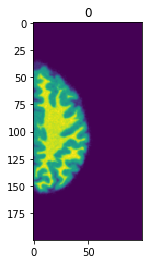

In [88]:
plt.imshow(valid_x[70][0].data.numpy());
plt.title(valid_y[70]);

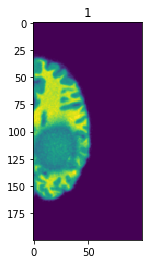

In [89]:
plt.imshow(valid_x[2][0].data.numpy());
plt.title(valid_y[2]);

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=3,
                out_channels=64,
                kernel_size=3,
                stride=2,   
                padding=0,        
            ),            
            nn.ReLU(),
            #nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(
                in_channels=64,
                out_channels=32,
                kernel_size=3,
                stride=2,   
                padding=0,        
            ),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=2),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(
                in_channels=32,
                out_channels=16,
                kernel_size=3,
                stride=2,   
                padding=0,        
            ),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=2),
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(
                in_channels=16,
                out_channels=8,
                kernel_size=3,
                stride=2,   
                padding=0,        
            ),
            nn.ReLU(), 
            #nn.MaxPool2d(kernel_size=2),
        )
        self.out = nn.Linear(440, 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = x.view(x.size(0), -1)
        #x = self.bout(x)
        #x = self.dropout1(x)
        output = self.out(x)
        return output, x

In [6]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(16, 8, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (out): Linear(in_features=440, out_features=2, bias=True)
)


In [11]:
optimizer = torch.optim.Adam(cnn.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

In [12]:
for epoch in range(200):
    batch_loss = []
    for step, (x, y) in enumerate(train_loader):
        
        b_x = Variable(x)
        b_y = Variable(y)

        cnn.train()
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        batch_loss.append(loss.data[0])
    
    cnn.eval()
    test_output, last_layer = cnn(valid_x)
    pred_y = torch.max(test_output, 1)[1].data.squeeze()
    accuracy = sum(pred_y == valid_y) / float(valid_y.size(0))
    print('Epoch: ', epoch, '| train loss: %.4f' % np.asarray(batch_loss).mean(), '| valid accuracy: %.2f' % accuracy)

NameError: name 'train_loader' is not defined

In [13]:
#torch.save(cnn.state_dict(), "./classifier_model.pth")

In [9]:
checkpoint = torch.load("./classifier_model.pth")
cnn.load_state_dict(checkpoint)

In [15]:
cnn.eval()
test_output, last_layer = cnn(c)
pred_y = torch.max(test_output, 1)[1].data.squeeze()
accuracy = sum(pred_y == valid_y) / float(valid_y.size(0))
print 'valid accuracy: %.2f' % accuracy

NameError: name 'valid_x' is not defined

In [7]:
class SubsetSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return iter(self.indices)

    def __len__(self):

        return len(self.indices)


In [9]:
results = []

for percent in ["0.0", 
                "0.1", 
                "0.2", 
                "0.3", 
                "0.4", 
                "0.5", 
                "0.6", 
                "0.7", 
                "0.8", 
                "0.9", 
                "1.0"]:
    
    path = "/data/lisa/data/cure-cancer-in-images/transformed-images/brats2013_pix2pix_" + percent + "/test_latest/"
    test_data_raw = torchvision.datasets.ImageFolder(path, transform=mytransform)
    
    labels = np.asarray(["True" in img for img in np.asarray(test_data_raw.imgs)[:,0]])
    fake_b_samples = np.where(["fake_B" in img for img in np.asarray(test_data_raw.imgs)[:,0]])[0]
    real_b_samples = np.where(["real_B" in img for img in np.asarray(test_data_raw.imgs)[:,0]])[0]

    test_fake_b_loader = torch.utils.data.DataLoader(dataset=test_data_raw, batch_size=len(test_data_raw), shuffle=False, 
                                              sampler=SubsetSampler(fake_b_samples))
    
    test_fake_b_data = list(test_fake_b_loader)
    test_fake_b_x = Variable(test_fake_b_data[0][0])
    test_fake_b_y = test_fake_b_data[0][1]
    
    cnn.eval()
    r = cnn(test_fake_b_x)

    pred_y = torch.max(r[0], 1)[1].data.squeeze().numpy()
    
    acc = (pred_y == labels[fake_b_samples]).mean()
    
    dist_0 = pred_y[labels[fake_b_samples] == 0].mean()
    dist_1 = pred_y[labels[fake_b_samples] == 1].mean()

    results.append([percent, pred_y.mean(), acc, dist_0, dist_1, collections.Counter(pred_y)])
    
    print "Percent:", percent," Tumors:", pred_y.mean(), " ", collections.Counter(pred_y)

Percent: 0.0  Tumors: 0.485049833887   Counter({0: 155, 1: 146})
Percent: 0.1  Tumors: 0.501661129568   Counter({1: 151, 0: 150})
Percent: 0.2  Tumors: 0.511627906977   Counter({1: 154, 0: 147})
Percent: 0.3  Tumors: 0.53488372093   Counter({1: 161, 0: 140})
Percent: 0.4  Tumors: 0.524916943522   Counter({1: 158, 0: 143})
Percent: 0.5  Tumors: 0.528239202658   Counter({1: 159, 0: 142})
Percent: 0.6  Tumors: 0.511627906977   Counter({1: 154, 0: 147})
Percent: 0.7  Tumors: 0.511627906977   Counter({1: 154, 0: 147})
Percent: 0.8  Tumors: 0.521594684385   Counter({1: 157, 0: 144})
Percent: 0.9  Tumors: 0.504983388704   Counter({1: 152, 0: 149})
Percent: 1.0  Tumors: 0.514950166113   Counter({1: 155, 0: 146})


In [22]:
results

[['0.0',
  0.43521594684385384,
  0.61461794019933558,
  0.30714285714285716,
  0.54658385093167705,
  Counter({0: 170, 1: 131})],
 ['0.1',
  0.55149501661129563,
  0.7375415282392026,
  0.29999999999999999,
  0.77018633540372672,
  Counter({0: 135, 1: 166})],
 ['0.2',
  0.5714285714285714,
  0.7441860465116279,
  0.31428571428571428,
  0.79503105590062106,
  Counter({0: 129, 1: 172})],
 ['0.3',
  0.55481727574750828,
  0.75415282392026584,
  0.2857142857142857,
  0.78881987577639756,
  Counter({0: 134, 1: 167})],
 ['0.4',
  0.55149501661129563,
  0.7441860465116279,
  0.29285714285714287,
  0.77639751552795033,
  Counter({0: 135, 1: 166})],
 ['0.5',
  0.56810631229235875,
  0.75415282392026584,
  0.29999999999999999,
  0.80124223602484468,
  Counter({0: 130, 1: 171})],
 ['0.6',
  0.55813953488372092,
  0.75083056478405319,
  0.29285714285714287,
  0.78881987577639756,
  Counter({0: 133, 1: 168})],
 ['0.7',
  0.55481727574750828,
  0.74750830564784054,
  0.29285714285714287,
  0.782608

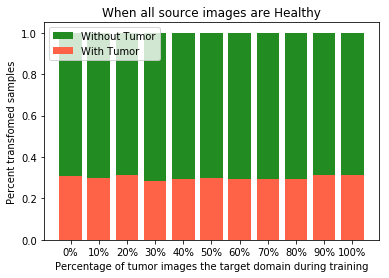

In [21]:
perc = np.asarray(results)[:,3].astype(np.float)
plt.bar(range(perc.shape[0]), 1-perc, bottom=perc,color="forestgreen", label="Without Tumor");
plt.bar(range(perc.shape[0]), perc, color="tomato", label="With Tumor");
plt.ylabel("Percent transfomed samples")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images are Healthy"); # (GT=False)
plt.legend(loc="upper left");

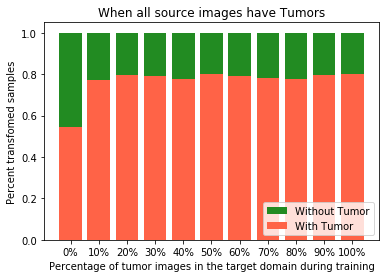

In [138]:
perc = np.asarray(results)[:,4].astype(np.float)
plt.bar(range(perc.shape[0]), 1-perc, bottom=perc,color="forestgreen", label="Without Tumor");
plt.bar(range(perc.shape[0]), perc, color="tomato", label="With Tumor");
plt.ylabel("Percent transfomed samples")
plt.xlabel("Percentage of tumor images in the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images have Tumors"); # (GT=False)
plt.legend(loc="lower right");

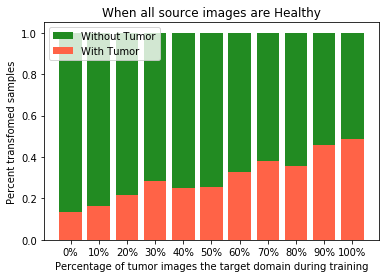

In [692]:
perc = np.asarray(results)[:,3].astype(np.float)
plt.bar(range(perc.shape[0]), 1-perc, bottom=perc,color="forestgreen", label="Without Tumor");
plt.bar(range(perc.shape[0]), perc, color="tomato", label="With Tumor");
plt.ylabel("Percent transfomed samples")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images are Healthy"); # (GT=False)
plt.legend(loc="upper left")

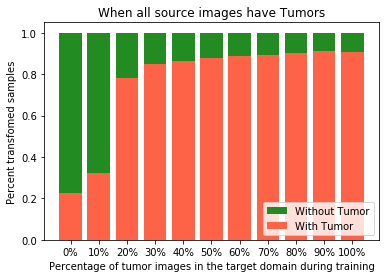

In [693]:
perc = np.asarray(results)[:,4].astype(np.float)
plt.bar(range(perc.shape[0]), 1-perc, bottom=perc,color="forestgreen", label="Without Tumor");
plt.bar(range(perc.shape[0]), perc, color="tomato", label="With Tumor");
plt.ylabel("Percent transfomed samples")
plt.xlabel("Percentage of tumor images in the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images have Tumors"); # (GT=False)
plt.legend(loc="lower right")

In [695]:
torch.save(cnn.state_dict(), "./classifier_model.pth")

In [24]:
import pandas as pd

In [26]:
d = pd.DataFrame(results)

In [27]:
d

,0,1,2,3,4,5
0,0.0,0.435216,0.614618,0.307143,0.546584,"{0: 170, 1: 131}"
1,0.1,0.551495,0.737542,0.300000,0.770186,"{0: 135, 1: 166}"
2,0.2,0.571429,0.744186,0.314286,0.795031,"{0: 129, 1: 172}"
3,0.3,0.554817,0.754153,0.285714,0.788820,"{0: 134, 1: 167}"
4,0.4,0.551495,0.744186,0.292857,0.776398,"{0: 135, 1: 166}"
5,0.5,0.568106,0.754153,0.300000,0.801242,"{0: 130, 1: 171}"
6,0.6,0.558140,0.750831,0.292857,0.788820,"{0: 133, 1: 168}"
7,0.7,0.554817,0.747508,0.292857,0.782609,"{0: 134, 1: 167}"
8,0.8,0.551495,0.744186,0.292857,0.776398,"{0: 135, 1: 166}"
9,0.9,0.571429,0.744186,0.314286,0.795031,"{0: 129, 1: 172}"


In [33]:
d[d[1] > 0.5]

,0,1,2,3,4,5
1,0.1,0.551495,0.737542,0.300000,0.770186,"{0: 135, 1: 166}"
2,0.2,0.571429,0.744186,0.314286,0.795031,"{0: 129, 1: 172}"
3,0.3,0.554817,0.754153,0.285714,0.788820,"{0: 134, 1: 167}"
4,0.4,0.551495,0.744186,0.292857,0.776398,"{0: 135, 1: 166}"
5,0.5,0.568106,0.754153,0.300000,0.801242,"{0: 130, 1: 171}"
6,0.6,0.558140,0.750831,0.292857,0.788820,"{0: 133, 1: 168}"
7,0.7,0.554817,0.747508,0.292857,0.782609,"{0: 134, 1: 167}"
8,0.8,0.551495,0.744186,0.292857,0.776398,"{0: 135, 1: 166}"
9,0.9,0.571429,0.744186,0.314286,0.795031,"{0: 129, 1: 172}"
10,1.0,0.574751,0.747508,0.314286,0.801242,"{0: 128, 1: 173}"


In [200]:
print "Getting L1 loss for pix to pix"
import os
from collections import OrderedDict
all_L1 = []
names = OrderedDict()
names['cyclegan'] = 'cyclegan'
names['pix2pix'] = 'L1'
names['pix2pix-cond'] = 'CondGAN'

# loading real data
path = "/data/lisa/data/cure-cancer-in-images/transformed-images/brats2013_pix2pix_1.0/test_latest/"
real_data_raw = torchvision.datasets.ImageFolder(path, transform=mytransform)
real_b_samples = np.where(["real_B" in img for img in np.asarray(real_data_raw.imgs)[:,0]])[0]
test_real_b_loader = torch.utils.data.DataLoader(dataset=real_data_raw, batch_size=len(real_data_raw), shuffle=False, 
                                                 sampler=SubsetSampler(real_b_samples))
test_real_b_data = list(test_real_b_loader)
test_real_b_x = Variable(test_real_b_data[0][0])

for loss_type in ['cyclegan', 'pix2pix', 'pix2pix-cond']:
    L1_results = []
    for percent in ["0.0", 
                    "0.1", 
                    "0.2", 
                    "0.3", 
                    "0.4", 
                    "0.5", 
                    "0.6", 
                    "0.7", 
                    "0.8", 
                    "0.9", 
                    "1.0"]:

        path = "/data/lisa/data/cure-cancer-in-images/transformed-images/brats2013_" + loss_type + "_" + percent + "/test_latest/"
        test_data_raw = torchvision.datasets.ImageFolder(path, transform=mytransform)

        labels = np.asarray(["True" in img for img in np.asarray(test_data_raw.imgs)[:,0]])
        fake_b_samples = np.where(["fake_B" in img for img in np.asarray(test_data_raw.imgs)[:,0]])[0]

        # loading generated data
        test_fake_b_loader = torch.utils.data.DataLoader(dataset=test_data_raw, batch_size=len(test_data_raw), shuffle=False, 
                                                 sampler=SubsetSampler(fake_b_samples))
        test_fake_b_data = list(test_fake_b_loader)
        test_fake_b_x = Variable(test_fake_b_data[0][0])

        L1_fake_real = np.abs(test_real_b_x.data.numpy() - test_fake_b_x.data.numpy())

        L1_0 = L1_fake_real[labels[fake_b_samples] == 0]
        L1_1 = L1_fake_real[labels[fake_b_samples] == 1]
        L1_mean = L1_fake_real.mean()
        L1_results.append([names[loss_type], percent, L1_fake_real.mean(), L1_0.mean(), L1_1.mean()])
        print names[loss_type], percent, 'done'
        
    all_L1.append(L1_results)

print 'all done'

Getting L1 loss for pix to pix
cyclegan 0.0 done
cyclegan 0.1 done
cyclegan 0.2 done
cyclegan 0.3 done
cyclegan 0.4 done
cyclegan 0.5 done
cyclegan 0.6 done
cyclegan 0.7 done
cyclegan 0.8 done
cyclegan 0.9 done
cyclegan 1.0 done
L1 0.0 done
L1 0.1 done
L1 0.2 done
L1 0.3 done
L1 0.4 done
L1 0.5 done
L1 0.6 done
L1 0.7 done
L1 0.8 done
L1 0.9 done
L1 1.0 done
CondGAN 0.0 done
CondGAN 0.1 done
CondGAN 0.2 done
CondGAN 0.3 done
CondGAN 0.4 done
CondGAN 0.5 done
CondGAN 0.6 done
CondGAN 0.7 done
CondGAN 0.8 done
CondGAN 0.9 done
CondGAN 1.0 done
all done


In [204]:
print test_fake_b_x.data.numpy()[labels[fake_b_samples] == 0].shape
print test_fake_b_x.data.numpy()[labels[fake_b_samples] == 1].shape
#L1_results
print all_L1_3D.shape 
all_L1_3D

(140, 3, 200, 100)
(161, 3, 200, 100)
(3, 11, 5)


array([[['cyclegan', '0.0', '0.0190775', '0.0124053', '0.0248794'],
        ['cyclegan', '0.1', '0.0196339', '0.0140641', '0.0244772'],
        ['cyclegan', '0.2', '0.018391', '0.0160868', '0.0203946'],
        ['cyclegan', '0.3', '0.0156284', '0.0129665', '0.0179431'],
        ['cyclegan', '0.4', '0.0145297', '0.0126422', '0.016171'],
        ['cyclegan', '0.5', '0.0151043', '0.0129456', '0.0169814'],
        ['cyclegan', '0.6', '0.0157142', '0.0136631', '0.0174978'],
        ['cyclegan', '0.7', '0.0183166', '0.0165304', '0.0198697'],
        ['cyclegan', '0.8', '0.015611', '0.0138927', '0.0171052'],
        ['cyclegan', '0.9', '0.0166557', '0.015257', '0.017872'],
        ['cyclegan', '1.0', '0.0175753', '0.0159649', '0.0189757']],

       [['L1', '0.0', '0.0139735', '0.00912572', '0.018189'],
        ['L1', '0.1', '0.01045', '0.00884236', '0.011848'],
        ['L1', '0.2', '0.0101711', '0.00879271', '0.0113698'],
        ['L1', '0.3', '0.00995401', '0.00869305', '0.0110505'],
      

['0.0124053' '0.0140641' '0.0160868' '0.0129665' '0.0126422' '0.0129456'
 '0.0136631' '0.0165304' '0.0138927' '0.015257' '0.0159649']


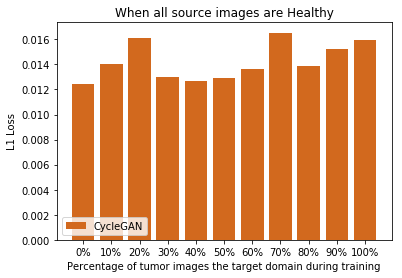

In [218]:
error = np.asarray(all_L1_3D)[0,:,3].astype(np.float)
plt.bar(range(error.shape[0]), error, color="chocolate", label="CycleGAN");
plt.ylabel("L1 Loss")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images are Healthy"); # (GT=False)
plt.legend(loc="lower left")
print np.asarray(all_L1_3D)[0,:,3]

['0.0248794' '0.0244772' '0.0203946' '0.0179431' '0.016171' '0.0169814'
 '0.0174978' '0.0198697' '0.0171052' '0.017872' '0.0189757']


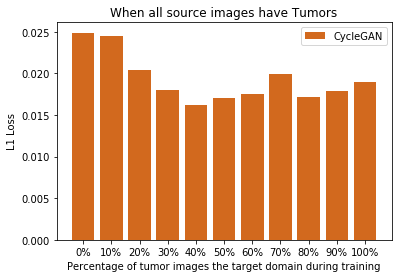

In [226]:
error = np.asarray(all_L1_3D)[0,:,4].astype(np.float)
plt.bar(range(error.shape[0]), error, color="chocolate", label="CycleGAN");
plt.ylabel("L1 Loss")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images have Tumors"); # (GT=False)
plt.legend(loc="upper right")
print np.asarray(all_L1_3D)[0,:,4]

['0.00912572' '0.00884236' '0.00879271' '0.00869305' '0.0086315'
 '0.00866054' '0.00865541' '0.00877067' '0.00892414' '0.00873031'
 '0.00893586']


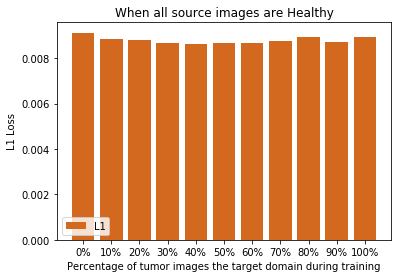

In [225]:
error = np.asarray(all_L1_3D)[1,:,3].astype(np.float)
plt.bar(range(error.shape[0]), error, color="chocolate", label="L1");
plt.ylabel("L1 Loss")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images are Healthy"); # (GT=False)
plt.legend(loc="lower left")
print np.asarray(all_L1_3D)[1,:,3]

['0.018189' '0.011848' '0.0113698' '0.0110505' '0.0108456' '0.0108671'
 '0.0107951' '0.0107448' '0.011234' '0.0106574' '0.0106807']


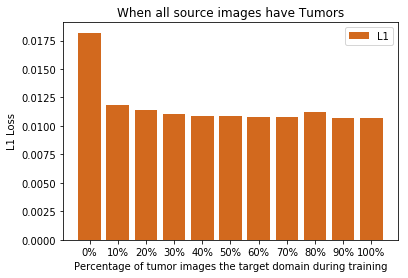

In [224]:
error = np.asarray(all_L1_3D)[1,:,4].astype(np.float)
plt.bar(range(error.shape[0]), error, color="chocolate", label="L1");
plt.ylabel("L1 Loss")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images have Tumors"); # (GT=False)
plt.legend(loc="upper right")
print np.asarray(all_L1_3D)[1,:,4]

['0.0156269' '0.0167458' '0.0168687' '0.0208573' '0.0169743' '0.0177599'
 '0.0171632' '0.0184998' '0.018497' '0.0198736' '0.0178926']


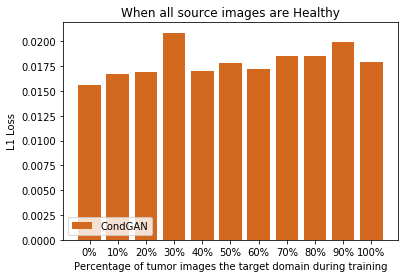

In [227]:
error = np.asarray(all_L1_3D)[2,:,3].astype(np.float)
plt.bar(range(error.shape[0]), error, color="chocolate", label="CondGAN");
plt.ylabel("L1 Loss")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images are Healthy"); # (GT=False)
plt.legend(loc="lower left")
print np.asarray(all_L1_3D)[2,:,3]

['0.0280262' '0.0234221' '0.0233604' '0.024205' '0.022713' '0.0222009'
 '0.0199451' '0.0240178' '0.025158' '0.0248366' '0.0233718']


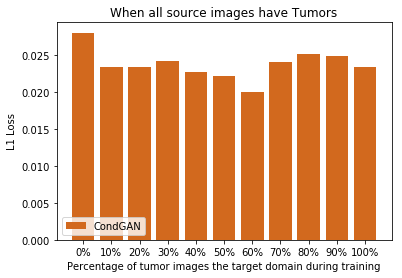

In [228]:
error = np.asarray(all_L1_3D)[2,:,4].astype(np.float)
plt.bar(range(error.shape[0]), error, color="chocolate", label="CondGAN");
plt.ylabel("L1 Loss")
plt.xlabel("Percentage of tumor images the target domain during training");
plt.xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
plt.title("When all source images have Tumors"); # (GT=False)
plt.legend(loc="lower left")
print np.asarray(all_L1_3D)[2,:,4]

In [10]:
print "Getting images for which classifier predicts always True or False across the three loss functions"
import os
from collections import OrderedDict
all_compare = []
names = OrderedDict()
names['cyclegan'] = 'cyclegan'
names['pix2pix'] = 'L1'
names['pix2pix-cond'] = 'CondGAN'

# loading real data
path = "/data/lisa/data/cure-cancer-in-images/transformed-images/brats2013_pix2pix_1.0/test_latest/"
real_data_raw = torchvision.datasets.ImageFolder(path, transform=mytransform)

# getting real_B
real_b_samples = np.where(["real_B" in img for img in np.asarray(real_data_raw.imgs)[:,0]])[0]
test_real_b_loader = torch.utils.data.DataLoader(dataset=real_data_raw, batch_size=len(real_data_raw), shuffle=False, 
                                                 sampler=SubsetSampler(real_b_samples))
test_real_b_data = list(test_real_b_loader)
test_real_b_x = Variable(test_real_b_data[0][0])

all_loss_type = ['cyclegan', 'pix2pix-cond', 'pix2pix']
for loss_type in all_loss_type:
    compare = []
    for percent in ["0.0", 
                    "0.1", 
                    "0.2", 
                    "0.3", 
                    "0.4", 
                    "0.5", 
                    "0.6", 
                    "0.7", 
                    "0.8", 
                    "0.9", 
                    "1.0"]:

        path = "/data/lisa/data/cure-cancer-in-images/transformed-images/brats2013_" + loss_type + "_" + percent + "/test_latest/"
        test_data_raw = torchvision.datasets.ImageFolder(path, transform=mytransform)

        labels = np.asarray(["True" in img for img in np.asarray(test_data_raw.imgs)[:,0]])
        fake_b_samples = np.where(["fake_B" in img for img in np.asarray(test_data_raw.imgs)[:,0]])[0]

        # loading generated data
        test_fake_b_loader = torch.utils.data.DataLoader(dataset=test_data_raw, batch_size=len(test_data_raw), shuffle=False, 
                                                 sampler=SubsetSampler(fake_b_samples))
        test_fake_b_data = list(test_fake_b_loader)
        test_fake_b_x = Variable(test_fake_b_data[0][0])

        cnn.eval()
        r = cnn(test_fake_b_x)

        pred_y = torch.max(r[0], 1)[1].data.squeeze().numpy()
    
        acc = pred_y == labels[fake_b_samples]

        #import pdb; pdb.set_trace()
        compare.append([acc])
        print names[loss_type], percent, 'done'
        
    all_compare.append(compare)

print 'all done'

Getting images for which classifier predicts always True or False across the three loss functions
cyclegan 0.0 done
cyclegan 0.1 done
cyclegan 0.2 done
cyclegan 0.3 done
cyclegan 0.4 done
cyclegan 0.5 done
cyclegan 0.6 done
cyclegan 0.7 done
cyclegan 0.8 done
cyclegan 0.9 done
cyclegan 1.0 done
CondGAN 0.0 done
CondGAN 0.1 done
CondGAN 0.2 done
CondGAN 0.3 done
CondGAN 0.4 done
CondGAN 0.5 done
CondGAN 0.6 done
CondGAN 0.7 done
CondGAN 0.8 done
CondGAN 0.9 done
CondGAN 1.0 done
L1 0.0 done
L1 0.1 done
L1 0.2 done
L1 0.3 done
L1 0.4 done
L1 0.5 done
L1 0.6 done
L1 0.7 done
L1 0.8 done
L1 0.9 done
L1 1.0 done
all done


In [11]:
all_compare = np.array(all_compare).reshape(3,11,301)
print all_compare.shape
sum_compare = np.sum(all_compare, axis=(0,1))
print sum_compare.shape
Healthy_all_zero = np.where(np.logical_and(sum_compare == 0, labels[fake_b_samples] == 1))
print "number of Healthy Source image all translated to Tumor is ", len(Healthy_all_zero[0]), "\n"
print Healthy_all_zero[0], "\n"

Healthy_all_one = np.where(np.logical_and(sum_compare == 33, labels[fake_b_samples] == 1))
print "number of Healthy Source image all translated to Healthy is ", len(Healthy_all_one[0]), "\n"
print Healthy_all_one[0], "\n"

Tumor_all_zero = np.where(np.logical_and(sum_compare == 0, labels[fake_b_samples] == 0))
print "number of Tumor Source image all translated to Tumor is ", len(Tumor_all_zero[0]), "\n"
print Tumor_all_zero[0], "\n"

Healthy_all_one = np.where(np.logical_and(sum_compare == 33, labels[fake_b_samples] == 0))
print "number of Tumor Source image all translated to Healthy is ", len(Healthy_all_one[0]), "\n"
print Healthy_all_one[0], "\n"

(3, 11, 301)
(301,)
number of Healthy Source image all translated to Tumor is  33 

[  7   8  39  54  56  58  70 108 109 114 115 116 124 125 132 133 134 135
 148 156 163 164 165 166 188 189 190 191 220 226 241 242 300] 

number of Healthy Source image all translated to Healthy is  26 

[ 12  13  16  33  34  51  64  72  73 107 110 111 117 121 122 136 138 150
 160 161 201 202 211 250 251 252] 

number of Tumor Source image all translated to Tumor is  24 

[  5  41  42  43  44  45  87  88  94  95 177 185 227 228 232 234 235 255
 267 268 270 272 274 292] 

number of Tumor Source image all translated to Healthy is  21 

[ 28  96 100 101 102 103 180 182 186 187 192 210 243 276 277 278 279 280
 288 294 295] 



In [17]:
print "getting img names"
Healthy_all_zero_img = np.asarray(real_data_raw.imgs)[:,0][Healthy_all_zero]
Healthy_all_one_img = np.asarray(real_data_raw.imgs)[:,0][Healthy_all_one]
Tumor_all_zero_img = np.asarray(real_data_raw.imgs)[:,0][Tumor_all_zero]
Healthy_all_one_img = np.asarray(real_data_raw.imgs)[:,0][Healthy_all_one]

getting img names


In [ ]:
print "tiling the images"

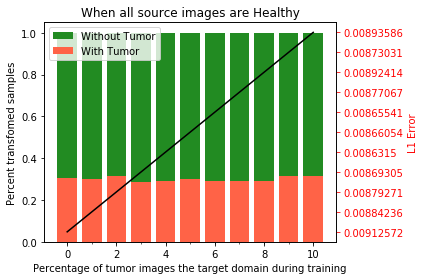

['0.00912572' '0.00884236' '0.00879271' '0.00869305' '0.0086315'
 '0.00866054' '0.00865541' '0.00877067' '0.00892414' '0.00873031'
 '0.00893586']


In [245]:
perc = np.asarray(results)[:,3].astype(np.float)
fig, ax1 = plt.subplots()
ax1.bar(range(perc.shape[0]), 1-perc, bottom=perc,color="forestgreen", label="Without Tumor");
ax1.bar(range(perc.shape[0]), perc, color="tomato", label="With Tumor");
ax1.set_ylabel("Percent transfomed samples")
ax1.set_xlabel("Percentage of tumor images the target domain during training");
ax1.set_xticks(range(11), ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"])
ax1.set_title("When all source images are Healthy"); # (GT=False)
ax1.legend(loc="upper left");

ax2 = ax1.twinx()
t = np.arange(11)
s2 = all_L1_3D[1,:,3]
#s2 = np.sin(2 * np.pi * t)
ax2.plot(t, s2, 'black')
ax2.set_ylabel('L1 Error', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()
print s2

torch.Size([301, 3, 200, 100])
torch.Size([301, 3, 200, 100])
iter  0
fake Image
real Image
iter  1
fake Image
real Image
iter  2
fake Image
real Image


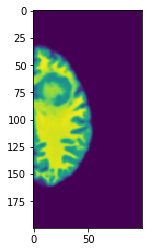

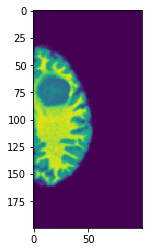

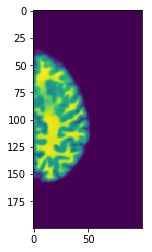

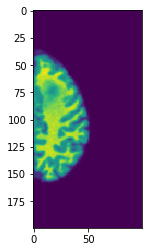

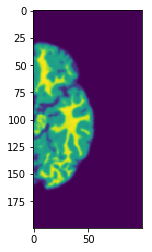

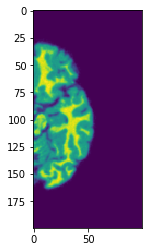

In [139]:
for i in xrange(3):
    print "iter ", i
    print "fake Image"
    plt.figure()
    plt.imshow(test_fake_b_x[i][0].data.numpy());
    #plt.title(test_fake_b_x[i]);
    
    print "real Image"
    plt.figure()
    plt.imshow(test_real_b_x[i][0].data.numpy());
    #plt.title(test_real_b_x[i]);
